In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

NUM_ITERATIONS = 5000
NUM_USER = 943
NUM_MOVIE = 1682
K = 30

In [2]:
#load dataset
def load_dataset(path):
    with open(path,"r") as f:
        m = NUM_USER
        n = NUM_MOVIE        
        R = np.zeros((m,n))       

        for line in f:
            fields = line.strip().split("\t")
            user_id, movie_id = map(int, (fields[0],fields[1]))
            R[user_id-1][movie_id-1] = float(fields[2])
                
        return R        


R_train = load_dataset("./ml-100k/u1.base")
R_valid = load_dataset("./ml-100k/u1.test")
# print(R_train)

In [3]:
# initialization
k = K
m = NUM_USER
n = NUM_MOVIE    
P = np.random.rand(m,k)
Q = np.random.rand(n,k)

In [4]:
#SGD
def sgdmf(R_train, R_valid, P, Q, K, iterations=NUM_ITERATIONS, learning_rate=0.0002,lamda=0.02):
    Q = Q.T
    R = R_train
    loss_valid_history = []
    epoch_set=[]
    for epoch in range(iterations):
        for i in range(m):
            for j in range(n):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + learning_rate * (2 * eij * Q[k][j] - lamda * P[i][k])
                        Q[k][j] = Q[k][j] + learning_rate * (2 * eij * P[i][k] - lamda * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(m):
            for j in range(n):
                if R_valid[i][j] > 0:
                    e = e + pow(R_valid[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (lamda/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        loss_valid_history.append(e)
        if epoch % 10 == 0:
            print("epoch",epoch)
            print("Loss of validation set:",e)
            print("-------------------------------------")
        if e < 0.001:
            break
    return P, Q.T, loss_valid_history

In [5]:
nP, nQ, loss_valid_history = sgdmf(R_train, R_valid, P, Q, K)
nR = np.dot(nP, nQ.T)

epoch 0
Loss of validation set: 137602.103877
-------------------------------------
epoch 10
Loss of validation set: 37241.02586
-------------------------------------
epoch 20
Loss of validation set: 31049.8588049
-------------------------------------
epoch 30
Loss of validation set: 28317.7113444
-------------------------------------
epoch 40
Loss of validation set: 26736.6699774
-------------------------------------
epoch 50
Loss of validation set: 25711.1801927
-------------------------------------
epoch 60
Loss of validation set: 25003.4204105
-------------------------------------
epoch 70
Loss of validation set: 24496.5932576
-------------------------------------
epoch 80
Loss of validation set: 24125.4468242
-------------------------------------
epoch 90
Loss of validation set: 23850.1750788
-------------------------------------
epoch 100
Loss of validation set: 23644.9328837
-------------------------------------
epoch 110
Loss of validation set: 23492.157257
--------------------

Loss of validation set: 27167.8649712
-------------------------------------
epoch 970
Loss of validation set: 27205.8239414
-------------------------------------
epoch 980
Loss of validation set: 27243.4695247
-------------------------------------
epoch 990
Loss of validation set: 27280.8048032
-------------------------------------
epoch 1000
Loss of validation set: 27317.8327659
-------------------------------------
epoch 1010
Loss of validation set: 27354.556318
-------------------------------------
epoch 1020
Loss of validation set: 27390.9782909
-------------------------------------
epoch 1030
Loss of validation set: 27427.1014505
-------------------------------------
epoch 1040
Loss of validation set: 27462.928505
-------------------------------------
epoch 1050
Loss of validation set: 27498.4621123
-------------------------------------
epoch 1060
Loss of validation set: 27533.7048859
-------------------------------------
epoch 1070
Loss of validation set: 27568.6594018
----------

Loss of validation set: 29713.0759496
-------------------------------------
epoch 1920
Loss of validation set: 29731.651513
-------------------------------------
epoch 1930
Loss of validation set: 29750.1100602
-------------------------------------
epoch 1940
Loss of validation set: 29768.452786
-------------------------------------
epoch 1950
Loss of validation set: 29786.6808683
-------------------------------------
epoch 1960
Loss of validation set: 29804.795468
-------------------------------------
epoch 1970
Loss of validation set: 29822.79773
-------------------------------------
epoch 1980
Loss of validation set: 29840.6887828
-------------------------------------
epoch 1990
Loss of validation set: 29858.4697388
-------------------------------------
epoch 2000
Loss of validation set: 29876.1416951
-------------------------------------
epoch 2010
Loss of validation set: 29893.705733
-------------------------------------
epoch 2020
Loss of validation set: 29911.1629189
-----------

epoch 2860
Loss of validation set: 31079.1113103
-------------------------------------
epoch 2870
Loss of validation set: 31090.2120757
-------------------------------------
epoch 2880
Loss of validation set: 31101.2602414
-------------------------------------
epoch 2890
Loss of validation set: 31112.2561609
-------------------------------------
epoch 2900
Loss of validation set: 31123.2001841
-------------------------------------
epoch 2910
Loss of validation set: 31134.0926571
-------------------------------------
epoch 2920
Loss of validation set: 31144.9339221
-------------------------------------
epoch 2930
Loss of validation set: 31155.7243181
-------------------------------------
epoch 2940
Loss of validation set: 31166.46418
-------------------------------------
epoch 2950
Loss of validation set: 31177.1538395
-------------------------------------
epoch 2960
Loss of validation set: 31187.7936246
-------------------------------------
epoch 2970
Loss of validation set: 31198.3838

epoch 3810
Loss of validation set: 31938.4203671
-------------------------------------
epoch 3820
Loss of validation set: 31945.7216453
-------------------------------------
epoch 3830
Loss of validation set: 31952.9928299
-------------------------------------
epoch 3840
Loss of validation set: 31960.2340822
-------------------------------------
epoch 3850
Loss of validation set: 31967.4455627
-------------------------------------
epoch 3860
Loss of validation set: 31974.6274307
-------------------------------------
epoch 3870
Loss of validation set: 31981.7798446
-------------------------------------
epoch 3880
Loss of validation set: 31988.9029618
-------------------------------------
epoch 3890
Loss of validation set: 31995.9969387
-------------------------------------
epoch 3900
Loss of validation set: 32003.0619308
-------------------------------------
epoch 3910
Loss of validation set: 32010.0980926
-------------------------------------
epoch 3920
Loss of validation set: 32017.10

-------------------------------------
epoch 4760
Loss of validation set: 32517.1917967
-------------------------------------
epoch 4770
Loss of validation set: 32522.2357145
-------------------------------------
epoch 4780
Loss of validation set: 32527.2612061
-------------------------------------
epoch 4790
Loss of validation set: 32532.2683619
-------------------------------------
epoch 4800
Loss of validation set: 32537.2572713
-------------------------------------
epoch 4810
Loss of validation set: 32542.2280235
-------------------------------------
epoch 4820
Loss of validation set: 32547.1807067
-------------------------------------
epoch 4830
Loss of validation set: 32552.1154091
-------------------------------------
epoch 4840
Loss of validation set: 32557.0322178
-------------------------------------
epoch 4850
Loss of validation set: 32561.9312196
-------------------------------------
epoch 4860
Loss of validation set: 32566.8125009
-------------------------------------
epoch

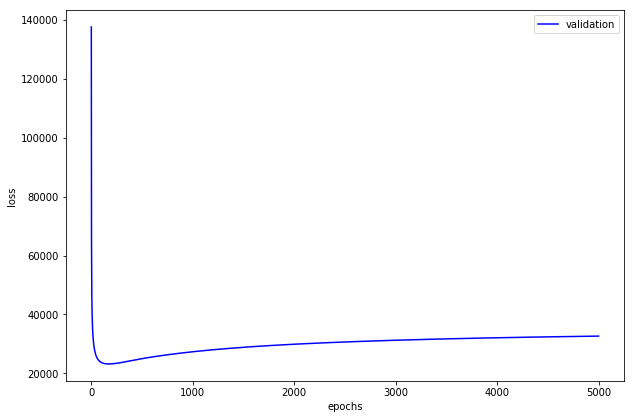

In [6]:
plt.figure(figsize=(10,15))
plt.subplot(211)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(loss_valid_history,color='blue',label='validation',linewidth=1.5,linestyle='-')
plt.legend(loc='upper right')
plt.show()